In [1]:
#Second attempt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('dark_background')

In [2]:
#Second attempt

# Constants

L = .10 #length of the tube
n = 20  #divisions of tube  
T0 = 0 #initial temperature at x=0


Ts = int(input("Enter temperature of heat source"))
print(Ts)
print(type(Ts))
dx = L/n # width per division
t_final = 20 # seconds
dt = .01 # change in time
alpha = .0001

x = np.linspace(dx/2,L-dx/2,n)

dTdt = np.empty(n)

t = np.arange(0,t_final+dt,dt)
T = np.ones((n,len(t)))*T0

for j in range(1,len(t)-1):
    
    for i in range(1,n-1):
        dTdt[i] = alpha*(-2*T[i,j]+T[i-1,j]+T[i+1,j])/dx**2
    dTdt[0] = alpha*((T0+T[1,j]-2*T[0,j])/dx**2)
    dTdt[n-1] = alpha*((T[n-2,j]+Ts-2*T[n-1,j])/dx**2)
    
    T[:,j+1] = T[:,j] + dTdt*dt

Enter temperature of heat source10
10
<class 'int'>


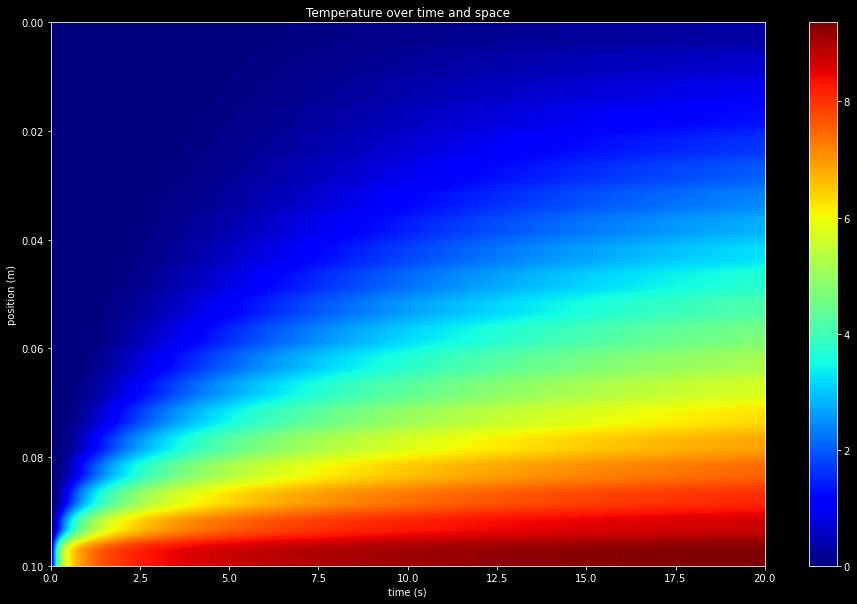

<Figure size 432x288 with 0 Axes>

In [3]:
#2-D projection of a 3Dplot
plt.figure(figsize=(1.6*10,10))
plt.imshow(T,extent=[0,t_final,L,0],aspect='auto',cmap = 'jet')
plt.colorbar()
plt.xlabel(r'time (s)')
plt.ylabel(r'position (m)')
plt.title(r'Temperature over time and space')
plt.show()
plt.savefig('Temp_imshow_plot')

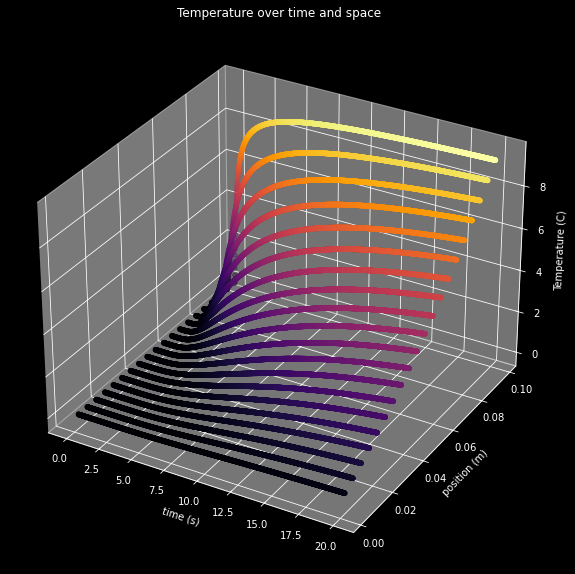

In [4]:
#3D Scatter Plot
plt.style.use('dark_background')
fig = plt.figure(figsize = (1.6*10,10))
ax = plt.axes(projection='3d')
t_mesh,x_mesh = np.meshgrid(t,x)
ax.scatter(t_mesh,x_mesh,T,c=T,cmap='inferno')

ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.set_zlabel('Temperature (C)')
ax.set_title('Temperature over time and space')
plt.savefig('Temp_scatter.png',transparent=True)